### K-Means

#### Kütüphaneler

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

#### Veri Seti

In [2]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


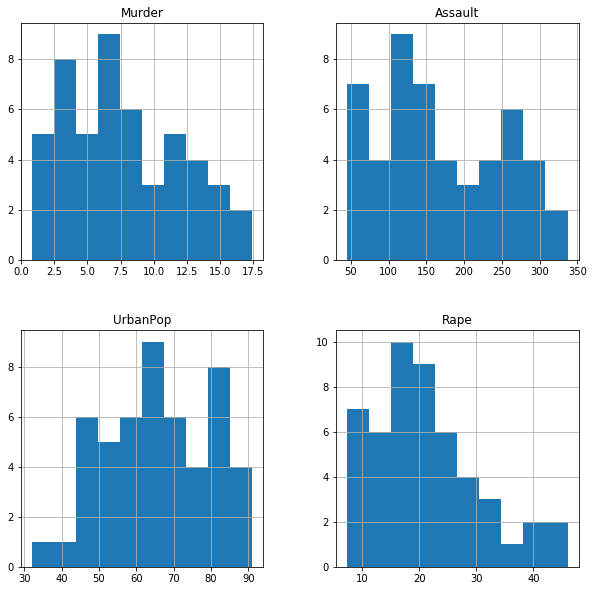

In [6]:
df.hist(figsize=(10,10));

In [7]:
kmeans = KMeans(n_clusters=4) #4 class tan oluşan nesne

In [8]:
kmeans

KMeans(n_clusters=4)

In [9]:
k_fit = kmeans.fit(df)

In [10]:
k_fit.n_clusters

4

In [11]:
k_fit.cluster_centers_#4 kümenin merkezleri ani gözlem birimleri

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [12]:
k_fit.labels_ #veri setinin gözlem birimlerinin etiketlerİ

array([0, 0, 0, 3, 0, 3, 1, 0, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 3, 0,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 3])

#### Kümelerin Görselleştirilmesi

In [13]:
k_means = KMeans(n_clusters=2).fit(df)

In [14]:
kumeler = k_means.labels_

In [15]:
kumeler # 2 tane kume geldi

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

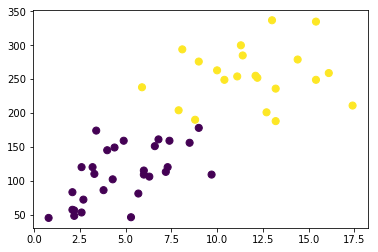

In [16]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis");

In [17]:
#veri setini 2 kümeye ayırdık

In [18]:
merkezler = k_means.cluster_centers_

In [19]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

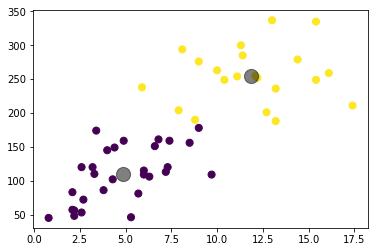

In [20]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis")
plt.scatter(merkezler[:,0],merkezler[:,1], c="black",s=200,alpha=0.5);

In [21]:
#50 gözlem birimine 2 kümeye ayrma yaptık. merkelere olan uzaklıklara göre yani biribirlerine göre uzaklıklara göre

#### Optimum Küme Sayısının Belirlenmesi

#### Elbow Yöntemi

In [22]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [23]:
ssd = [] #uzaklık karelerinin farklarının toplamı
K=range(1,30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)#herfarklı kmeans için topla

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5,1,'Optimum Küme sayısı için Elbow Yöntemi')

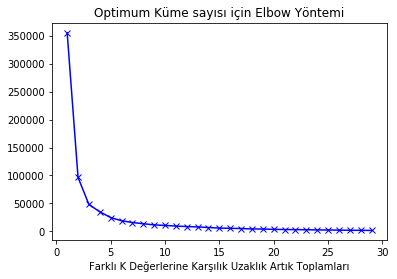

In [24]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [25]:
#küme sayısı gözlem birimine eşit olursa herbiri için ayrı olur hata olmaz.

In [26]:
!pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/3a/15/58feb940b6a2f52d3335cccf9e5d00704ec5ba62782da83f7e2abeca5e4b/yellowbrick-1.3.post1-py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
from yellowbrick.cluster import KElbowVisualizer

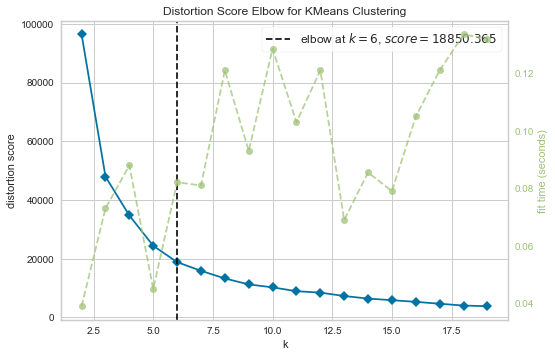

In [30]:
kmeans=KMeans()
visu = KElbowVisualizer(kmeans,k=(2,20))
visu.fit(df)
visu.poof()

In [31]:
kmeans = KMeans(n_clusters=4).fit(df)
kmeans

KMeans(n_clusters=4)

In [32]:
kumeler = kmeans.labels_

In [33]:
pd.DataFrame({"Eyaletler":df.index,"Kumeler":kumeler})

,Eyaletler,Kumeler
0,Alabama,3
1,Alaska,3
2,Arizona,3
3,Arkansas,1
4,California,3
5,Colorado,1
6,Connecticut,2
7,Delaware,3
8,Florida,3
9,Georgia,1


In [36]:
df["Kume_No"]=kumeler #gözlem birimlerini kmeans ile kumelere (sekmentlere) ayırdık.

In [35]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,3
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,1


### Hiyerarşik Kümeleme

### Hiyerarşik Kümeleme

In [38]:
from scipy.cluster.hierarchy import linkage

In [40]:
hc_complete = linkage(df,"complete")
hc_average = linkage(df,"average")

In [41]:
from scipy.cluster.hierarchy import dendrogram

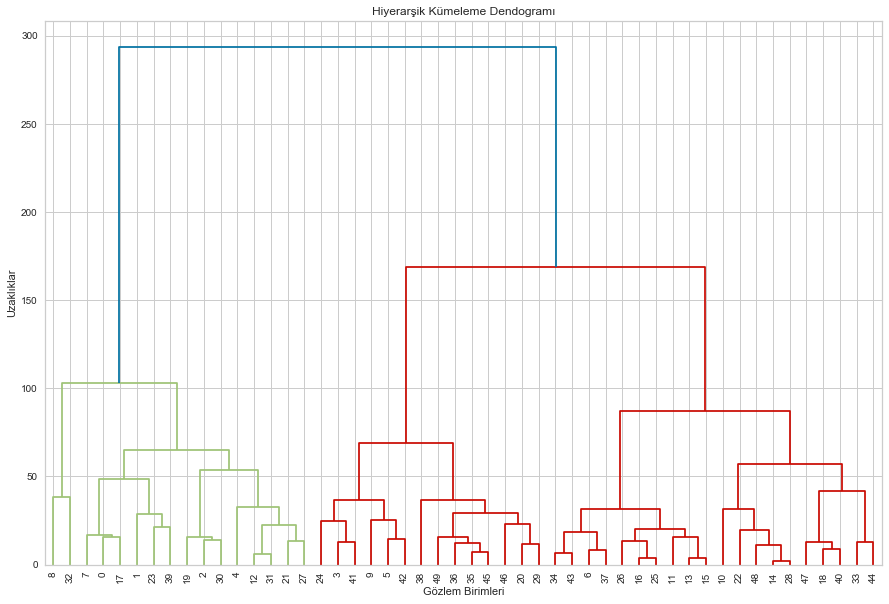

In [43]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
          leaf_font_size=10);

In [45]:
# grafiği yatay bölerek küme sayısına kaar verebiliriz

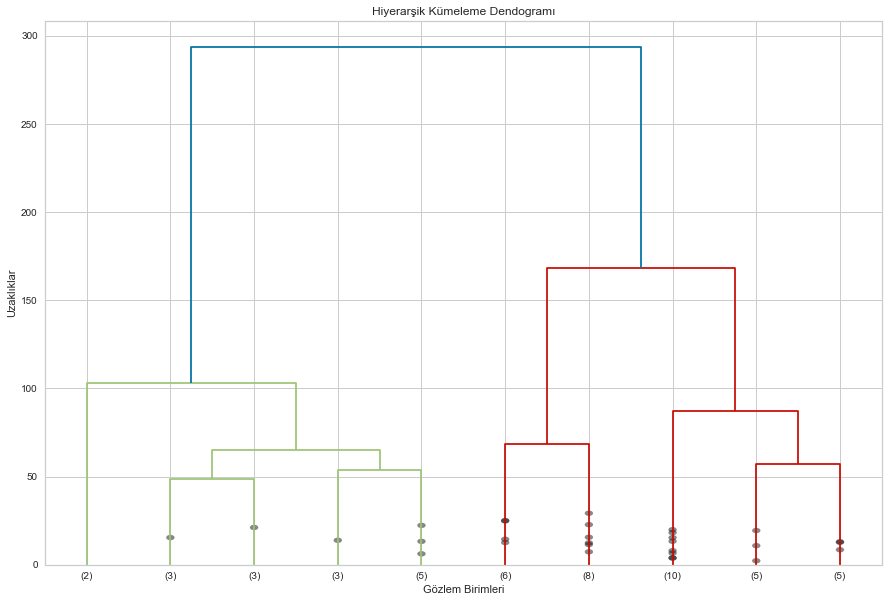

In [48]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,#küme sayısı
           show_contracted=True,
          leaf_font_size=10);

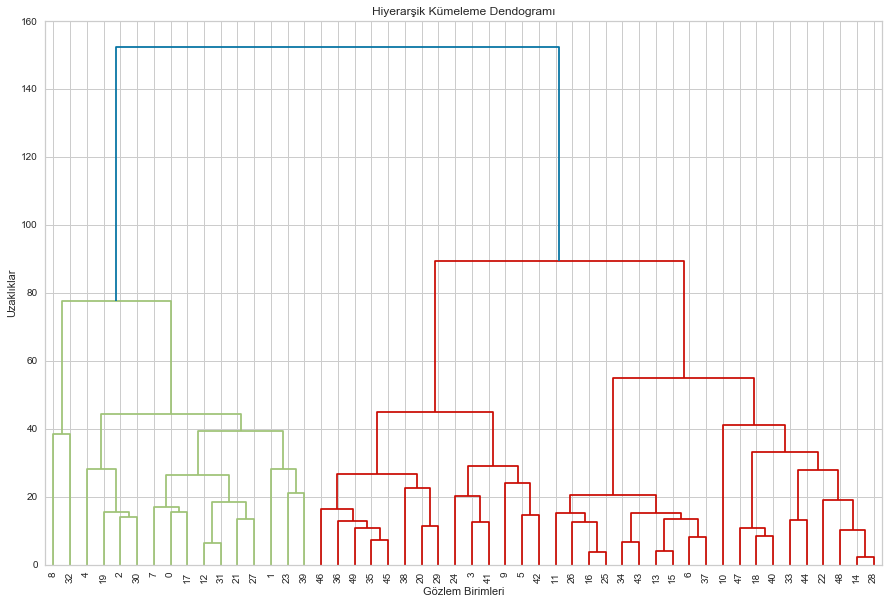

In [49]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          leaf_font_size=10);

### Temel Bileşen Analizi

In [8]:
df = pd.read_csv("Hitters.csv")
df.dropna(inplace=True) #veriseti içinde eksik gözlemleri atıyor
df=df._get_numeric_data() #veriseti içinde sayılar gözlemleri al
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
df = StandardScaler().fit_transform(df)

In [13]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [14]:
from sklearn.decomposition import PCA 

In [15]:
pca = PCA(n_components=2) #temel bileşen analizin model nesnesi
pca_fit = pca.fit_transform(df) # amaç çok sayısında

In [16]:
bilesen_df = pd.DataFrame(data=pca_fit, columns=["birinci_bilesen","ikinci_bilesen"])

In [17]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [19]:
pca.explained_variance_ratio_ #açıklanabilen varyans

array([0.45245466, 0.24246801])

In [21]:
pca.components_[1] # 1 bileşen seçimi

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

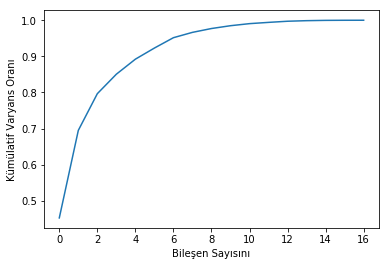

In [27]:
#potimum bileşen sayısı
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #degişken saysı kadar oluşan bileşenin kümelatif toplamı
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı"); # bieşen sayılarında yanlışlıkvar +1 düşün

In [28]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [30]:
#final
pca = PCA(n_components=3) #temel bileşen analizin model nesnesi
pca_fit = pca.fit_transform(df) # amaç çok sayısında

In [32]:
pca.explained_variance_ratio_ # yaklaşık %80ni 3 bileşenle ifade etmiş oluyoruz

array([0.45245466, 0.24246801, 0.1016968 ])